In [2]:
import pandas as pd
import numpy as np

In [3]:
#loading tables into dataframes
drug_df = pd.read_csv('drug_fda.csv')
new_drug_df = drug_df[['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname',
       'val_vbm', 'cum_dose_chr', 'cum_dose_unit', 'lot_num']]

demo_df = pd.read_csv('demo_fda.csv')
new_demo_df = demo_df[['primaryid', 'caseid', 'caseversion', 'age', 'age_cod',
       'sex', 'wt', 'wt_cod', 'occp_cod', 'reporter_country', 'occr_country',
       'occp_cod_num']]

outcomes_df = pd.read_csv('outcomes_fda.csv')

reactions_df = pd.read_csv('reaction_fda.csv')

/Users/endernova/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/endernova/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
new_drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546835 entries, 0 to 1546834
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   primaryid      1546835 non-null  int64  
 1   caseid         1546835 non-null  int64  
 2   drug_seq       1546835 non-null  int64  
 3   role_cod       1546835 non-null  object 
 4   drugname       1546823 non-null  object 
 5   val_vbm        1546835 non-null  int64  
 6   cum_dose_chr   49001 non-null    float64
 7   cum_dose_unit  49011 non-null    object 
 8   lot_num        236716 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 106.2+ MB


In [5]:
new_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394066 entries, 0 to 394065
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   primaryid         394066 non-null  int64  
 1   caseid            394066 non-null  int64  
 2   caseversion       394066 non-null  int64  
 3   age               235444 non-null  float64
 4   age_cod           235452 non-null  object 
 5   sex               347760 non-null  object 
 6   wt                81142 non-null   float64
 7   wt_cod            81142 non-null   object 
 8   occp_cod          387070 non-null  object 
 9   reporter_country  394066 non-null  object 
 10  occr_country      394053 non-null  object 
 11  occp_cod_num      387070 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 36.1+ MB


In [6]:
outcomes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299135 entries, 0 to 299134
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   primaryid  299135 non-null  int64 
 1   caseid     299135 non-null  int64 
 2   outc_cod   299135 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.8+ MB


In [7]:
reactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250978 entries, 0 to 1250977
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   primaryid     1250978 non-null  int64 
 1   caseid        1250978 non-null  int64 
 2   pt            1250978 non-null  object
 3   drug_rec_act  2988 non-null     object
dtypes: int64(2), object(2)
memory usage: 38.2+ MB


In [8]:
drug_demo = new_drug_df.merge(new_demo_df, on='primaryid', how='left')
drug_demo

,primaryid,caseid_x,drug_seq,role_cod,drugname,val_vbm,cum_dose_chr,cum_dose_unit,lot_num,caseid_y,caseversion,age,age_cod,sex,wt,wt_cod,occp_cod,reporter_country,occr_country,occp_cod_num
0,36703554,3670355,1,SS,METOPROLOL.,1,NaN,NaN,NaN,3670355,4,1.0,DY,F,2.200000,KG,OT,CA,BE,7984.0
1,36703554,3670355,2,PS,HYDROCHLOROTHIAZIDE.,1,NaN,NaN,NaN,3670355,4,1.0,DY,F,2.200000,KG,OT,CA,BE,7984.0
2,36703554,3670355,3,SS,LOSARTAN.,1,NaN,NaN,NaN,3670355,4,1.0,DY,F,2.200000,KG,OT,CA,BE,7984.0
3,36703554,3670355,4,SS,FELODIPINE.,1,NaN,NaN,NaN,3670355,4,1.0,DY,F,2.200000,KG,OT,CA,BE,7984.0
4,37617136,3761713,1,PS,GLIVEC,1,7200.0,MG,NaN,3761713,6,58.0,YR,M,48.599998,KG,MD,JP,JP,7768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546830,1559507712,15595077,17,C,MELPHALAN.,1,NaN,NaN,NaN,15595077,12,60.0,YR,F,NaN,NaN,OT,SK,SK,7984.0
1546831,1559507712,15595077,18,C,G-CSF,1,NaN,NaN,NaN,15595077,12,60.0,YR,F,NaN,NaN,OT,SK,SK,7984.0
1546832,1559507712,15595077,19,C,CYCLOPHOSPHAMIDE.,1,NaN,NaN,NaN,15595077,12,60.0,YR,F,NaN,NaN,OT,SK,SK,7984.0
1546833,1559507712,15595077,20,C,PLERIXAFOR,1,NaN,NaN,NaN,15595077,12,60.0,YR,F,NaN,NaN,OT,SK,SK,7984.0


In [9]:
reporter_counts = drug_demo.reset_index().groupby('occp_cod').nunique()
'''
CN = Consumer
LW = Lawyer
MD = Physician
OT = Other health-care professional
PH = Pharmacist
'''
reporter_counts

,index,primaryid,caseid_x,drug_seq,role_cod,drugname,val_vbm,cum_dose_chr,cum_dose_unit,lot_num,...,caseversion,age,age_cod,sex,wt,wt_cod,occp_cod,reporter_country,occr_country,occp_cod_num
occp_cod,,,,,,,,,,,,,,,,,,,,,
CN,538631,168973,168973,310,4,28474,2,2399,19,23336,...,50,698,6,3,2594,2,1,120,130,1
LW,41199,6431,6431,259,4,2774,2,364,7,72,...,17,87,4,2,376,1,1,15,14,1
MD,425845,99246,99246,227,4,27834,2,4258,20,10998,...,60,476,6,3,2176,2,1,137,137,1
OT,354945,80654,80654,200,4,23323,2,2797,22,9293,...,48,179,6,3,2207,2,1,122,124,1
PH,115688,31766,31766,256,4,13614,2,854,14,4211,...,27,141,5,3,1357,2,1,75,75,1


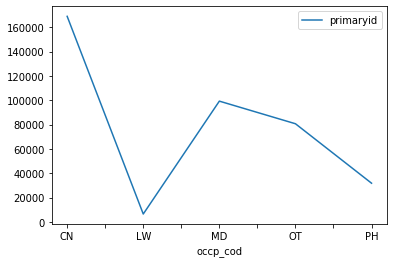

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
reporter_counts.plot(y = 'primaryid')
plt.title('Report Counts per Report Source Role')
plt.show()
plt.savefig(fname='reporter_counts')

In [11]:
drug_demo_outcomes = drug_demo.merge(outcomes_df,on='primaryid',how='left')
drug_demo_outcomes

,primaryid,caseid_x,drug_seq,role_cod,drugname,val_vbm,cum_dose_chr,cum_dose_unit,lot_num,caseid_y,...,age_cod,sex,wt,wt_cod,occp_cod,reporter_country,occr_country,occp_cod_num,caseid,outc_cod
0,36703554,3670355,1,SS,METOPROLOL.,1,NaN,NaN,NaN,3670355,...,DY,F,2.2,KG,OT,CA,BE,7984.0,3670355.0,CA
1,36703554,3670355,1,SS,METOPROLOL.,1,NaN,NaN,NaN,3670355,...,DY,F,2.2,KG,OT,CA,BE,7984.0,3670355.0,DE
2,36703554,3670355,1,SS,METOPROLOL.,1,NaN,NaN,NaN,3670355,...,DY,F,2.2,KG,OT,CA,BE,7984.0,3670355.0,DS
3,36703554,3670355,1,SS,METOPROLOL.,1,NaN,NaN,NaN,3670355,...,DY,F,2.2,KG,OT,CA,BE,7984.0,3670355.0,HO
4,36703554,3670355,1,SS,METOPROLOL.,1,NaN,NaN,NaN,3670355,...,DY,F,2.2,KG,OT,CA,BE,7984.0,3670355.0,LT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007861,1559507712,15595077,17,C,MELPHALAN.,1,NaN,NaN,NaN,15595077,...,YR,F,NaN,NaN,OT,SK,SK,7984.0,15595077.0,OT
2007862,1559507712,15595077,18,C,G-CSF,1,NaN,NaN,NaN,15595077,...,YR,F,NaN,NaN,OT,SK,SK,7984.0,15595077.0,OT
2007863,1559507712,15595077,19,C,CYCLOPHOSPHAMIDE.,1,NaN,NaN,NaN,15595077,...,YR,F,NaN,NaN,OT,SK,SK,7984.0,15595077.0,OT
2007864,1559507712,15595077,20,C,PLERIXAFOR,1,NaN,NaN,NaN,15595077,...,YR,F,NaN,NaN,OT,SK,SK,7984.0,15595077.0,OT


In [12]:
outcome_counts = drug_demo_outcomes.reset_index().groupby('outc_cod').nunique()

'''
CA = congenital anomaly
DE = death
DS = disability
HO = Hospitalization - initial or prolonged
LT = life-threatening
OT = other serious (important medical event)
RI = required intervention to prevent permanent impairment/damage
'''

outcome_counts

,index,primaryid,caseid_x,drug_seq,role_cod,drugname,val_vbm,cum_dose_chr,cum_dose_unit,lot_num,...,age_cod,sex,wt,wt_cod,occp_cod,reporter_country,occr_country,occp_cod_num,caseid,outc_cod
outc_cod,,,,,,,,,,,,,,,,,,,,,
CA,5760,1335,1335,71,3,1472,2,126,9,66,...,6,3,197,1,5,50,50,5,1335,1
DE,149112,31964,31964,256,4,14238,2,1710,16,2794,...,6,3,1200,2,5,124,131,5,31964,1
DS,39454,6410,6410,124,4,7157,2,721,11,1027,...,5,2,745,2,5,82,81,5,6410,1
HO,562203,94243,94243,227,4,35855,2,4518,20,11997,...,6,3,2512,2,5,133,132,5,94243,1
LT,78221,12113,12113,195,4,11366,2,1235,18,1373,...,5,3,973,2,5,101,102,5,12113,1
OT,793599,152703,152703,310,4,38789,2,5473,21,15891,...,6,3,2773,2,5,149,149,5,152703,1
RI,755,367,367,28,3,419,2,0,0,40,...,3,2,146,2,4,2,2,4,367,1


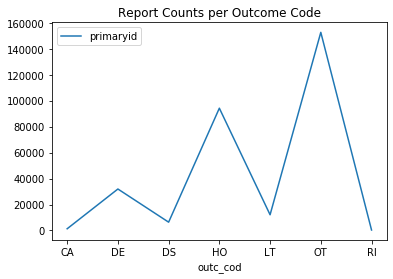

In [48]:
outcome_counts.plot(y = 'primaryid')
plt.title('Report Counts per Outcome Code')
plt.show()


In [14]:
reactions_df = pd.read_csv('reaction_fda.csv')
merged_df = drug_demo_outcomes.merge(reactions_df, on='primaryid',how='left')

In [15]:
merged_df['drugname'].describe()

count     11231379
unique       61843
top         XOLAIR
freq        335438
Name: drugname, dtype: object

In [16]:
# ages = merged_df.reset_index().groupby('age').nunique()
# ages
# # ages.plot(y='age',kind='hist', bins=100)
# # plt.show()

In [17]:
merged_df[['age','age_cod']]
merged_df['age_cod'].unique()

def code_to_numeric(code):
    '''
    Converts age units to age in years
    '''
    if code == 'DY':
        return 1/365
    if code == 'YR':
        return 1
    if code == np.nan:
        return 0
    if code == 'MON':
        return 1/12
    if code == 'DEC':
        return 10
    if code == 'WK':
        return 7/365
    if code == 'HR':
        return 1/8760


In [18]:
merged_df['age_multiplier'] = merged_df['age_cod'].map(code_to_numeric)
merged_df['age_multiplier']

0           0.00274
1           0.00274
2           0.00274
3           0.00274
4           0.00274
             ...   
11231388    1.00000
11231389    1.00000
11231390    1.00000
11231391    1.00000
11231392    1.00000
Name: age_multiplier, Length: 11231393, dtype: float64

In [19]:
merged_df['age_in_years'] = merged_df['age'] * merged_df['age_multiplier']
(merged_df['age_in_years']).describe()

count    8.872598e+06
mean     5.722855e+01
std      1.840358e+01
min     -1.000000e+01
25%      4.700000e+01
50%      6.000000e+01
75%      7.000000e+01
max      1.170000e+02
Name: age_in_years, dtype: float64

Text(0.5, 1.0, 'Distribution of Age in Years')

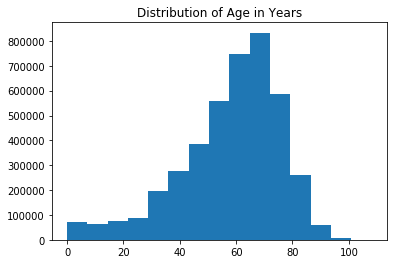

In [42]:
plt.hist(merged_df['age_in_years'], bins=15)
plt.title('Distribution of Age in Years')

In [21]:
merged_df[['wt_cod','wt']]
merged_df['wt_cod'].unique()

def weight_conversion(code):
    '''
    converts weight units to weight in lbs
    '''
    if code == 'KG':
        return 2.20462
    if code == np.nan:
        return 0
    if code == 'LBS':
        return 1


In [22]:
merged_df['weight_multiplier'] = merged_df['wt_cod'].map(weight_conversion)
merged_df['weight_multiplier']

0           2.20462
1           2.20462
2           2.20462
3           2.20462
4           2.20462
             ...   
11231388        NaN
11231389        NaN
11231390        NaN
11231391        NaN
11231392        NaN
Name: weight_multiplier, Length: 11231393, dtype: float64

In [23]:
merged_df['wt_in_lbs'] = merged_df['weight_multiplier'] * merged_df['wt']
merged_df['wt_in_lbs']

0           4.850164
1           4.850164
2           4.850164
3           4.850164
4           4.850164
              ...   
11231388         NaN
11231389         NaN
11231390         NaN
11231391         NaN
11231392         NaN
Name: wt_in_lbs, Length: 11231393, dtype: float64

(array([4.651748e+06, 3.150000e+02, 9.000000e+00, 3.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 6.000000e+00]),
 array([   0.     ,  637.13518, 1274.27036, 1911.40554, 2548.54072,
        3185.6759 , 3822.81108, 4459.94626, 5097.08144, 5734.21662,
        6371.3518 ]),
 <a list of 10 Patch objects>)

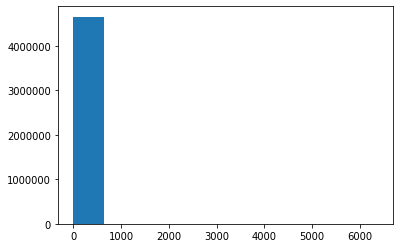

In [24]:
plt.hist(merged_df['wt_in_lbs'])

In [25]:
merged_df[merged_df['wt_in_lbs'] == merged_df['wt_in_lbs'].max()]

,primaryid,caseid_x,drug_seq,role_cod,drugname,val_vbm,cum_dose_chr,cum_dose_unit,lot_num,caseid_y,...,occp_cod_num,caseid_x,outc_cod,caseid_y,pt,drug_rec_act,age_multiplier,age_in_years,weight_multiplier,wt_in_lbs
6201604,155361851,15536185,1,PS,Amoxicillin/Clavulanic acid,1,NaN,NaN,NaN,15536185,...,7768.0,15536185.0,OT,15536185,Foetal exposure during pregnancy,NaN,NaN,NaN,2.20462,6371.3518
6201605,155361851,15536185,1,PS,Amoxicillin/Clavulanic acid,1,NaN,NaN,NaN,15536185,...,7768.0,15536185.0,OT,15536185,Premature baby,NaN,NaN,NaN,2.20462,6371.3518
6201606,155361851,15536185,2,SS,Cefalexin,1,NaN,NaN,NaN,15536185,...,7768.0,15536185.0,OT,15536185,Foetal exposure during pregnancy,NaN,NaN,NaN,2.20462,6371.3518
6201607,155361851,15536185,2,SS,Cefalexin,1,NaN,NaN,NaN,15536185,...,7768.0,15536185.0,OT,15536185,Premature baby,NaN,NaN,NaN,2.20462,6371.3518
6201608,155361851,15536185,3,SS,DEXAMETHASONE.,1,NaN,NaN,NaN,15536185,...,7768.0,15536185.0,OT,15536185,Foetal exposure during pregnancy,NaN,NaN,NaN,2.20462,6371.3518
6201609,155361851,15536185,3,SS,DEXAMETHASONE.,1,NaN,NaN,NaN,15536185,...,7768.0,15536185.0,OT,15536185,Premature baby,NaN,NaN,NaN,2.20462,6371.3518


In [26]:
merged_df = merged_df[merged_df['wt_in_lbs'] <= 500]
merged_df = merged_df[merged_df['age'] > 0]
merged_df.shape

(4210273, 29)

Text(0.5, 1.0, 'Age vs Weight in Males and Females')

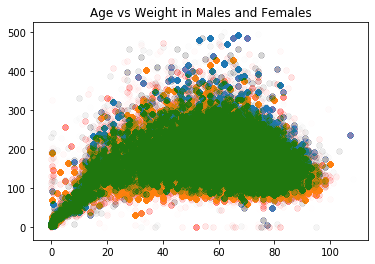

In [47]:
plt.scatter(merged_df['age_in_years'][merged_df['sex'] == 'M'], merged_df['wt_in_lbs'][merged_df['sex']=='M'], alpha=0.005)
plt.scatter(merged_df['age_in_years'][merged_df['sex'] == 'F'], merged_df['wt_in_lbs'][merged_df['sex']=='F'], alpha=0.005)
plt.legend
plt.title('Age vs Weight in Males and Females')


In [28]:
merged_df['age_group'] = (merged_df['age_in_years'] // 10) * 10 
merged_df.groupby(['age_group','sex']).count()['primaryid']

age_group  sex
0.0        F       39636
           M       48655
10.0       F       52428
           M       46625
20.0       F       90721
           M       40332
30.0       F      170200
           M      124033
40.0       F      318114
           M      152241
50.0       F      482834
           M      338422
60.0       F      716482
           M      413515
70.0       F      452632
           M      392967
80.0       F      178439
           M      119869
90.0       F       15446
           M        7419
100.0      F         740
           M         153
Name: primaryid, dtype: int64

In [29]:
x = merged_df.groupby(['age_group','sex'])
top_drugs_per_age = x['drugname'].describe()
top_drugs_per_age

count unique                    top   freq
age_group sex                                             
0.0       F     39636   1277                 ILARIS   1524
          M     48655   1648            VINCRISTINE   2042
10.0      F     52428   1801                 XOLAIR   1251
          M     46625   1634                 ILARIS   2204
20.0      F     90721   2651              PREDONINE   2137
          M     40332   1621                 HUMIRA    984
30.0      F    170200   3776                 XOLAIR  18372
          M    124033   2424                 XOLAIR   4250
40.0      F    318114   5189                 XOLAIR   6178
          M    152241   3780                 XOLAIR   8640
50.0      F    482834   7083                 XOLAIR  19150
          M    338422   5507                 XOLAIR  20093
60.0      F    716482   8933  SANDOSTATIN LAR DEPOT  13201
          M    413515   7832                 HUMIRA   5659
70.0      F    452632   7801                 XOLAIR  10630
          M    392967   7482                 XOLAIR   6684
80.0      F    178439   4565                 HUMIRA   3098
          M    119869   4061            FUROSEMIDE.   1596
90.0      F     15446   1184                 LYRICA    283
          M      7419    793                XARELTO    268
100.0     F       740     44            PARACETAMOL     66
          M       153     20          ROSUVASTATIN.     25

In [30]:
age_sex_grouped = merged_df.groupby(['age_group','sex']).count()
top_drugs_per_age['percentage'] = (top_drugs_per_age['freq'] / age_sex_grouped['primaryid']) * 100
top_drugs_per_age

count unique                    top   freq percentage
age_group sex                                                        
0.0       F     39636   1277                 ILARIS   1524    3.84499
          M     48655   1648            VINCRISTINE   2042     4.1969
10.0      F     52428   1801                 XOLAIR   1251    2.38613
          M     46625   1634                 ILARIS   2204    4.72708
20.0      F     90721   2651              PREDONINE   2137    2.35557
          M     40332   1621                 HUMIRA    984    2.43975
30.0      F    170200   3776                 XOLAIR  18372    10.7944
          M    124033   2424                 XOLAIR   4250    3.42651
40.0      F    318114   5189                 XOLAIR   6178    1.94207
          M    152241   3780                 XOLAIR   8640    5.67521
50.0      F    482834   7083                 XOLAIR  19150    3.96617
          M    338422   5507                 XOLAIR  20093    5.93726
60.0      F    716482   8933  SANDOSTATIN LAR DEPOT  13201    1.84247
          M    413515   7832                 HUMIRA   5659    1.36851
70.0      F    452632   7801                 XOLAIR  10630    2.34849
          M    392967   7482                 XOLAIR   6684    1.70091
80.0      F    178439   4565                 HUMIRA   3098    1.73617
          M    119869   4061            FUROSEMIDE.   1596    1.33145
90.0      F     15446   1184                 LYRICA    283    1.83219
          M      7419    793                XARELTO    268    3.61235
100.0     F       740     44            PARACETAMOL     66    8.91892
          M       153     20          ROSUVASTATIN.     25    16.3399

In [31]:
abrv_df = merged_df[['age_in_years','sex','age_group','drugname','outc_cod','occp_cod']]
# abrv_df['sex'].value_counts()

In [32]:
#splitting into 2 df

np.mean(abrv_df['age_in_years']) #Avg age 58.077675310317574
np.median(abrv_df['age_in_years']) #Median 62.0


62.0

In [33]:
below_mean_age = abrv_df[abrv_df['age_in_years'] < 58.07]
above_mean_age = abrv_df[abrv_df['age_in_years'] >= 58.07]

In [34]:
above_mean_age.head()

,age_in_years,sex,age_group,drugname,outc_cod,occp_cod
558,76.0,M,70.0,DESFERAL,DE,OT
559,76.0,M,70.0,DESFERAL,DE,OT
560,76.0,M,70.0,DESFERAL,DE,OT
561,76.0,M,70.0,DESFERAL,DE,OT
562,76.0,M,70.0,DESFERAL,DE,OT


In [35]:
'''
CODE MEANING_TEXT
 ---- ------------
 DE Death
 LT Life-Threatening
 HO Hospitalization - Initial or Prolonged
 DS Disability
 CA Congenital Anomaly
 RI Required Intervention to Prevent Permanent Impairment/Damage
 OT Other Serious (Important Medical Event)
'''

'''
H0: those below the avg age have just as much occrrence of death from medications than those above/equal to mean age
Ha: any difference between the groups
'''

def new_df_from_col(df, list_columns):
    new_df = df[list_columns]
    return new_df 

